In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Parsing the GRCh38 VCF file
# Exploratory computational analysis of ClinVar variants to identify disease associated genetic patterns
use_cols= ["Chromosome",
    "PositionVCF",
    "ReferenceAlleleVCF",
    "AlternateAlleleVCF",
    "GeneSymbol",
    "ClinicalSignificance",
    "ReviewStatus",
    "PhenotypeList"]
df=pd.read_csv('variant_summary.txt', sep='\t', usecols= use_cols, nrows=500_000, low_memory=False)

In [6]:
df.head()

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF
0,AP5Z1,Pathogenic/Likely pathogenic,Hereditary spastic paraplegia 48|Macular dystr...,7,"criteria provided, multiple submitters, no con...",4820844,GGAT,TGCTGTAAACTGTAACTGTAAA
1,AP5Z1,Pathogenic/Likely pathogenic,Hereditary spastic paraplegia 48|Macular dystr...,7,"criteria provided, multiple submitters, no con...",4781213,GGAT,TGCTGTAAACTGTAACTGTAAA
2,AP5Z1,Pathogenic,Hereditary spastic paraplegia 48,7,no assertion criteria provided,4827360,GCTGCTGGACCTGCC,G
3,AP5Z1,Pathogenic,Hereditary spastic paraplegia 48,7,no assertion criteria provided,4787729,GCTGCTGGACCTGCC,G
4,ZNF592,Uncertain significance,Galloway-Mowat syndrome 1,15,no assertion criteria provided,85342440,G,A


In [7]:
df.shape
df.dtypes

GeneSymbol              object
ClinicalSignificance    object
PhenotypeList           object
Chromosome              object
ReviewStatus            object
PositionVCF              int64
ReferenceAlleleVCF      object
AlternateAlleleVCF      object
dtype: object

In [8]:
df.columns

Index(['GeneSymbol', 'ClinicalSignificance', 'PhenotypeList', 'Chromosome',
       'ReviewStatus', 'PositionVCF', 'ReferenceAlleleVCF',
       'AlternateAlleleVCF'],
      dtype='object')

In [9]:
df.value_counts('ClinicalSignificance').head(10)

ClinicalSignificance
Uncertain significance                          135263
Conflicting classifications of pathogenicity     92405
Pathogenic                                       79383
Benign                                           65377
Benign/Likely benign                             42123
Likely benign                                    34348
Pathogenic/Likely pathogenic                     18480
Likely pathogenic                                14159
not provided                                     12266
other                                             2996
Name: count, dtype: int64

In [10]:
df['ClinicalSignificance']=df['ClinicalSignificance'].str.split(',')

In [11]:
df['ClinicalSignificance']

0                         [Pathogenic/Likely pathogenic]
1                         [Pathogenic/Likely pathogenic]
2                                           [Pathogenic]
3                                           [Pathogenic]
4                               [Uncertain significance]
                               ...                      
499995    [Conflicting classifications of pathogenicity]
499996                                          [Benign]
499997                                          [Benign]
499998    [Conflicting classifications of pathogenicity]
499999    [Conflicting classifications of pathogenicity]
Name: ClinicalSignificance, Length: 500000, dtype: object

In [12]:
df['ClinicalSignificance'].explode().value_counts().head(10)

ClinicalSignificance
Uncertain significance                          135263
Conflicting classifications of pathogenicity     92405
Pathogenic                                       79393
Benign                                           65377
Benign/Likely benign                             42123
Likely benign                                    34348
Pathogenic/Likely pathogenic                     18480
Likely pathogenic                                14161
not provided                                     12266
other                                             2996
Name: count, dtype: int64

In [13]:
df.value_counts('ReviewStatus')

ReviewStatus
criteria provided, multiple submitters, no conflicts    186597
criteria provided, single submitter                     128274
criteria provided, conflicting classifications           92113
no assertion criteria provided                           54393
reviewed by expert panel                                 25497
no classification provided                               12264
no classification for the single variant                   552
-                                                          138
no classifications from unflagged records                  100
practice guideline                                          72
Name: count, dtype: int64

In [14]:
df['ReviewStatus']=df['ReviewStatus'].str.split(',')

In [15]:
df['ReviewStatus']

0         [criteria provided,  multiple submitters,  no ...
1         [criteria provided,  multiple submitters,  no ...
2                          [no assertion criteria provided]
3                          [no assertion criteria provided]
4                          [no assertion criteria provided]
                                ...                        
499995    [criteria provided,  conflicting classifications]
499996               [criteria provided,  single submitter]
499997               [criteria provided,  single submitter]
499998    [criteria provided,  conflicting classifications]
499999    [criteria provided,  conflicting classifications]
Name: ReviewStatus, Length: 500000, dtype: object

In [16]:
# Review confidence distribution 
df['ReviewStatus'].explode().value_counts().head(10)

ReviewStatus
criteria provided                           406984
 multiple submitters                        186597
 no conflicts                               186597
 single submitter                           128274
 conflicting classifications                 92113
no assertion criteria provided               54393
reviewed by expert panel                     25497
no classification provided                   12264
no classification for the single variant       552
-                                              138
Name: count, dtype: int64

In [17]:
#Number of pathogenic variants
df["ClinicalSignificance"].astype(str).str.contains("Pathogenic", case=False, na=False).sum()


204935

In [18]:
#Pathogenic variants that are peer-reviewed
pathogenic=df[ df['ClinicalSignificance'].astype(str).str.contains('Pathogenic'or 'Likely pathogenic', case= False,na=False) & df['ReviewStatus'].astype(str).str.contains('expert panel|multiple submitters', case=False, na=False)]
pathogenic.head()

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF
0,AP5Z1,[Pathogenic/Likely pathogenic],Hereditary spastic paraplegia 48|Macular dystr...,7,"[criteria provided, multiple submitters, no ...",4820844,GGAT,TGCTGTAAACTGTAACTGTAAA
1,AP5Z1,[Pathogenic/Likely pathogenic],Hereditary spastic paraplegia 48|Macular dystr...,7,"[criteria provided, multiple submitters, no ...",4781213,GGAT,TGCTGTAAACTGTAACTGTAAA
6,FOXRED1,[Pathogenic],"Mitochondrial complex I deficiency, nuclear ty...",11,"[criteria provided, multiple submitters, no ...",126145284,C,T
7,FOXRED1,[Pathogenic],"Mitochondrial complex I deficiency, nuclear ty...",11,"[criteria provided, multiple submitters, no ...",126275389,C,T
32,HFE,[Pathogenic/Likely pathogenic],Hemochromatosis type 1|Hereditary hemochromato...,6,"[criteria provided, multiple submitters, no ...",26093144,A,C


In [19]:
#Finding frequency of top diseased genes
pathogenic['GeneSymbol'].value_counts().head(10)

GeneSymbol
BRCA2    5037
BRCA1    4402
LDLR     1679
MLH1     1304
MSH2     1206
CFTR      912
PAH       823
ATM       774
MSH6      610
TTN       566
Name: count, dtype: int64

In [20]:
#Finding disease frequency analysis
pathogenic['PhenotypeList'].str.split(',').explode().value_counts().head(10)

PhenotypeList
 familial                                                          12459
 susceptibility to                                                 11318
Breast-ovarian cancer                                               7017
 1                                                                  2470
Hypercholesterolemia                                                1649
 2                                                                  1641
Lynch syndrome                                                       841
 hereditary nonpolyposis                                             780
Hereditary breast ovarian cancer syndrome|Breast-ovarian cancer      691
Hereditary cancer-predisposing syndrome|Breast-ovarian cancer        578
Name: count, dtype: int64

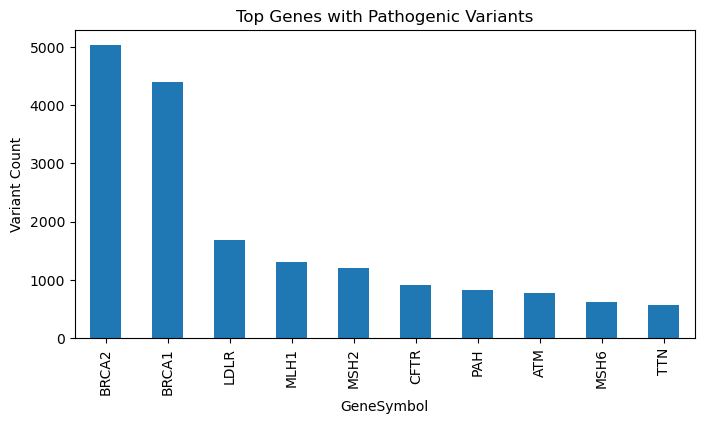

In [21]:
## Plot of pathogenic genes
pathogenic["GeneSymbol"].value_counts().head(10).plot(
    kind="bar",
    figsize=(8,4),
    title="Top Genes with Pathogenic Variants"
)
plt.ylabel("Variant Count")
plt.show()

In [22]:
#Explainable Analysis of ClinVar Variant Annotations to Understand Gene–Disease Associations
#Research Questions

# Which genes accumulate the highest number of pathogenic variants?

# How does clinical confidence affect variant interpretation?

# Why is pathogenic filtering biologically meaningful?


In [23]:
## Sorting genes by phenotype(disease)

disease_frequency=pathogenic.groupby(['GeneSymbol','PhenotypeList']).size().reset_index().rename(columns={0:'Pathogenic_variant_count'}).sort_values('Pathogenic_variant_count',ascending=False).head(10)

C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pathogenic_variant_count', ylabel='PhenotypeList'>

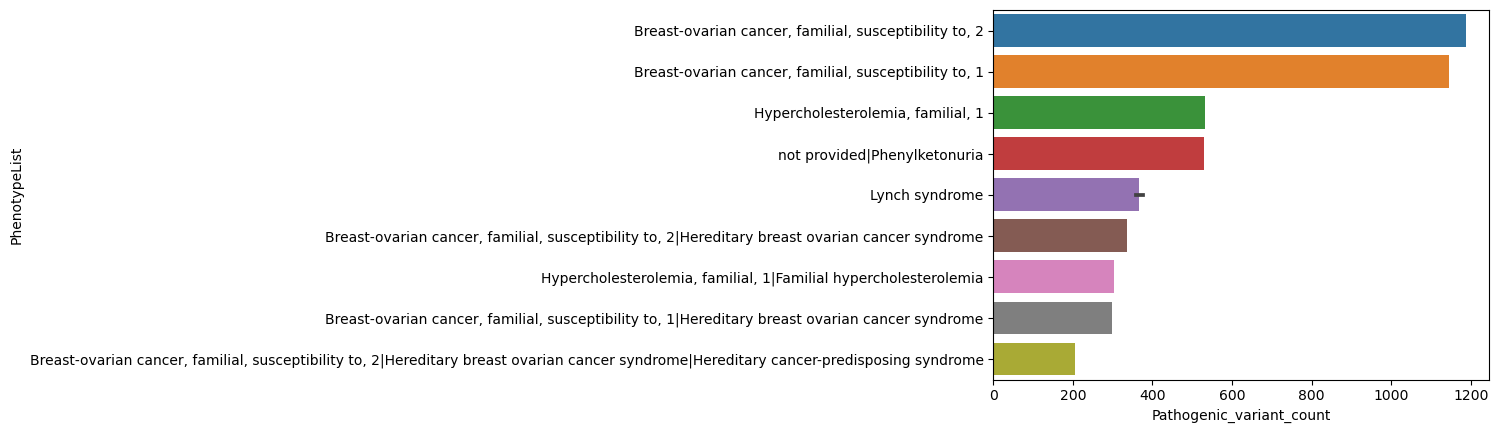

In [24]:
#Plot of top 10 genes by pathogenic variant count

sns.barplot(disease_frequency,x='Pathogenic_variant_count',y='PhenotypeList')

# Project 2: Breast Cancer focused genomic analysis

In [25]:
breast_cancer_df= df[df['PhenotypeList'].str.contains('breast',case=False,na=False)]

In [26]:
breast_cancer_df.head()

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF
825,DPYD,[drug response],Dihydropyrimidine dehydrogenase deficiency|Flu...,1,[reviewed by expert panel],97915614,C,T
826,DPYD,[drug response],Dihydropyrimidine dehydrogenase deficiency|Flu...,1,[reviewed by expert panel],97450058,C,T
1555,APC,[Conflicting classifications of pathogenicity;...,"|Breast cancer, susceptibility to|Familial ade...",5,"[criteria provided, conflicting classifications]",112175211,T,A
1556,APC,[Conflicting classifications of pathogenicity;...,"|Breast cancer, susceptibility to|Familial ade...",5,"[criteria provided, conflicting classifications]",112839514,T,A
1567,APC,[Benign/Likely benign],Familial adenomatous polyposis 1|not provided|...,5,"[criteria provided, multiple submitters, no ...",112175240,G,C


In [27]:
breast_cancer_df.shape

(36064, 8)

In [28]:
pathogenic_variants_breast_cancer=breast_cancer_df[breast_cancer_df['ClinicalSignificance'].astype(str).str.contains('Pathogenic' or 'LikelyPathogenic', case=False, na=False) & breast_cancer_df['ReviewStatus'].astype(str).str.contains('expert panel|multiple submitters',case=False, na=False)]

In [29]:
pathogenic_variants_breast_cancer.head(10)

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF
2337,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23646214,A,T
2338,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634893,A,T
2339,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23614792,G,C
2340,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23603471,G,C
2341,PALB2,[Pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634324,G,A
2342,PALB2,[Pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23623003,G,A
2365,B3GLCT,[Pathogenic],Peters plus syndrome|not provided|B3GLCT-relat...,13,"[criteria provided, multiple submitters, no ...",31843415,G,A
2366,B3GLCT,[Pathogenic],Peters plus syndrome|not provided|B3GLCT-relat...,13,"[criteria provided, multiple submitters, no ...",31269278,G,A
2917,NAGLU,[Pathogenic/Likely pathogenic],"Mucopolysaccharidosis, MPS-III-B|not provided|...",17,"[criteria provided, multiple submitters, no ...",40693092,C,T
2918,NAGLU,[Pathogenic/Likely pathogenic],"Mucopolysaccharidosis, MPS-III-B|not provided|...",17,"[criteria provided, multiple submitters, no ...",42541074,C,T


In [30]:
# Top genes associated with breast cancer

breast_cancer_gene_counts= pathogenic_variants_breast_cancer['GeneSymbol'].value_counts().head(10)
breast_cancer_gene_counts.head(10)

GeneSymbol
BRCA2     5033
BRCA1     4400
ATM        708
PALB2      396
CHEK2      174
BRIP1      146
CDH1       120
BARD1       94
RAD51C      80
TP53        64
Name: count, dtype: int64

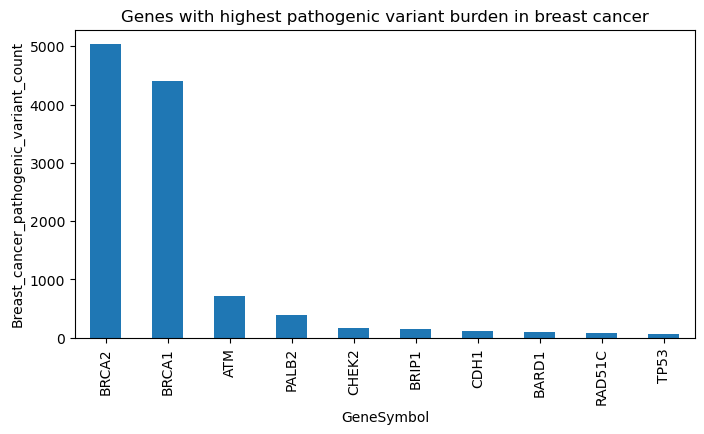

In [31]:
# Visualization of gene distribution in breast Cancer

breast_cancer_gene_counts.plot(kind='bar',figsize=(8,4),title='Genes with highest pathogenic variant burden in breast cancer')
plt.ylabel('Breast_cancer_pathogenic_variant_count')
plt.show()

In [32]:
#disease diversity
pathogenic_variants_breast_cancer['PhenotypeList'].value_counts().head(10)

PhenotypeList
Breast-ovarian cancer, familial, susceptibility to, 2                                                                                      1187
Breast-ovarian cancer, familial, susceptibility to, 1                                                                                      1144
Breast-ovarian cancer, familial, susceptibility to, 2|Hereditary breast ovarian cancer syndrome                                             336
Breast-ovarian cancer, familial, susceptibility to, 1|Hereditary breast ovarian cancer syndrome                                             298
Breast-ovarian cancer, familial, susceptibility to, 2|Hereditary breast ovarian cancer syndrome|Hereditary cancer-predisposing syndrome     206
Breast-ovarian cancer, familial, susceptibility to, 1|Hereditary breast ovarian cancer syndrome|Hereditary cancer-predisposing syndrome     170
Breast-ovarian cancer, familial, susceptibility to, 2|Hereditary cancer-predisposing syndrome                             

In [33]:
#variant distribution across chromosome
pathogenic_variants_breast_cancer['Chromosome'].value_counts().sort_index()

Chromosome
1       16
10      20
11     726
12       6
13    5040
14       4
15       6
16     520
17    4738
19       4
2      150
21       2
22     174
3       40
4        2
5       10
6        2
7       26
8       14
9        8
X        4
na       1
Name: count, dtype: int64

## Detailed analysis of pathogenic variants at VEP level

In [36]:
# creating a function to define type of VEP mutations

def variant_type(pathogenic_variants_breast_cancer):
    ref=pathogenic_variants_breast_cancer['ReferenceAlleleVCF']
    alt=pathogenic_variants_breast_cancer['AlternateAlleleVCF']
    if len(ref)==1 and len(alt)==1:
        return 'SNV'
    elif len(ref)> len(alt):
        return 'Deletion'
    elif len(ref)< len(alt):
        return 'Insertion'
    else:
        return 'Complex'
pathogenic_variants_breast_cancer['VariantType']=pathogenic_variants_breast_cancer.apply(variant_type,axis=1)
pathogenic_variants_breast_cancer['VariantType'].value_counts()

C:\Users\faizm\AppData\Local\Temp\ipykernel_29300\2911561828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathogenic_variants_breast_cancer['VariantType']=pathogenic_variants_breast_cancer.apply(variant_type,axis=1)


VariantType
Deletion     5374
SNV          3980
Insertion    2078
Complex        81
Name: count, dtype: int64

In [37]:
pathogenic_variants_breast_cancer['VariantType'].value_counts().head()

VariantType
Deletion     5374
SNV          3980
Insertion    2078
Complex        81
Name: count, dtype: int64

In [43]:
pathogenic_variants_breast_cancer['VariantType'].head(20)


2337         SNV
2338         SNV
2339         SNV
2340         SNV
2341         SNV
2342         SNV
2365         SNV
2366         SNV
2917         SNV
2918         SNV
3297         SNV
3298         SNV
3375         SNV
3376         SNV
4889         SNV
4890         SNV
5576    Deletion
5577    Deletion
5578    Deletion
5579    Deletion
Name: VariantType, dtype: object

In [44]:
pathogenic_variants_breast_cancer.head()

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,VariantType
2337,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23646214,A,T,SNV
2338,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634893,A,T,SNV
2339,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23614792,G,C,SNV
2340,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23603471,G,C,SNV
2341,PALB2,[Pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634324,G,A,SNV


In [55]:
top_varianttype_pergene=pathogenic_variants_breast_cancer.groupby(['VariantType','GeneSymbol']).size().reset_index().rename(columns={0:'variant_type_count_pergene'}).sort_values('variant_type_count_pergene',ascending=False).head(20)

C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='VariantType', ylabel='variant_type_count_pergene'>

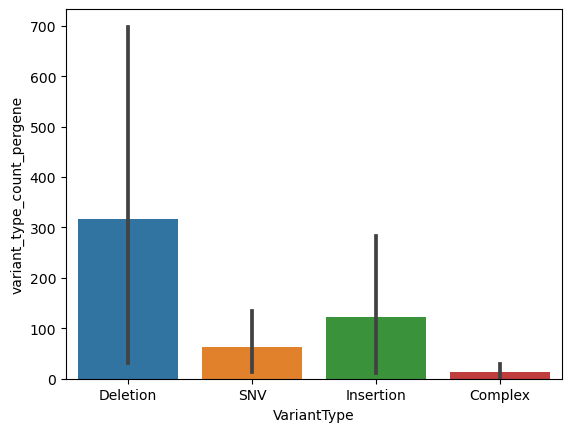

In [54]:
sns.barplot(top_varianttype_pergene,x='VariantType',y='variant_type_count_pergene')

C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\faizm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GeneSymbol', ylabel='variant_type_count_pergene'>

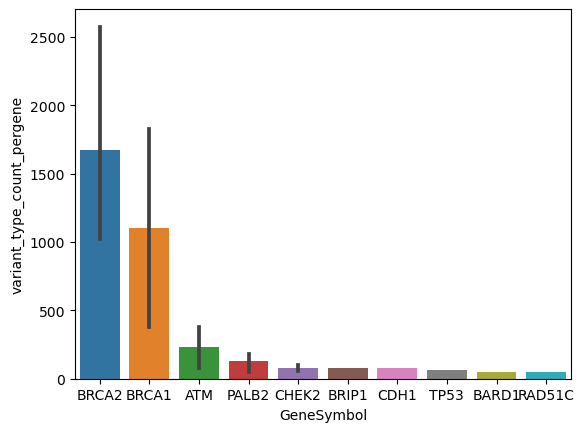

In [57]:
sns.barplot(top_varianttype_pergene,x='GeneSymbol',y='variant_type_count_pergene')

In [65]:
#Pathogenic fraction per gene
total_per_gene = breast_cancer_df["GeneSymbol"].value_counts()
pathogenic_per_gene = pathogenic_variants_breast_cancer["GeneSymbol"].value_counts()

gene_pathogenic_fraction = (
    pathogenic_per_gene / total_per_gene
).dropna().sort_values(ascending=False)

gene_pathogenic_fraction

GeneSymbol
HOXB13    1.000000
HEXA      1.000000
HGD       1.000000
GBE1      1.000000
HOGA1     1.000000
            ...   
RAD51D    0.095023
RAD50     0.090909
NBN       0.090909
BARD1     0.087933
PMS2      0.075758
Name: count, Length: 66, dtype: float64

In [68]:
#Gene phenotype mapping
gene_phenotypes = (
    pathogenic_variants_breast_cancer
    .groupby("GeneSymbol")["PhenotypeList"]
    .nunique()
    .sort_values(ascending=False)
)

gene_phenotypes.head(10)


GeneSymbol
BRCA2     700
BRCA1     498
ATM       193
PALB2     119
BRIP1      65
CHEK2      52
CDH1       39
RAD51C     38
TP53       32
BARD1      26
Name: PhenotypeList, dtype: int64

In [69]:
# Detecting clustering in genes
gene_variant_counts = pathogenic["GeneSymbol"].value_counts()

gene_variant_counts.describe()

count    2208.000000
mean       25.459692
std       160.336637
min         1.000000
25%         2.000000
50%         6.000000
75%        14.000000
max      5037.000000
Name: count, dtype: float64

In [70]:
gene_variant_counts_bc = pathogenic_variants_breast_cancer["GeneSymbol"].value_counts()

gene_variant_counts_bc.describe()


count      66.000000
mean      174.439394
std       817.418829
min         2.000000
25%         2.000000
50%         2.000000
75%        10.000000
max      5033.000000
Name: count, dtype: float64

In [71]:
gene_variant_counts_bc

GeneSymbol
BRCA2    5033
BRCA1    4400
ATM       708
PALB2     396
CHEK2     174
         ... 
NF1         2
BLM         2
MYO7A       2
CDH23       2
TGM1        2
Name: count, Length: 66, dtype: int64

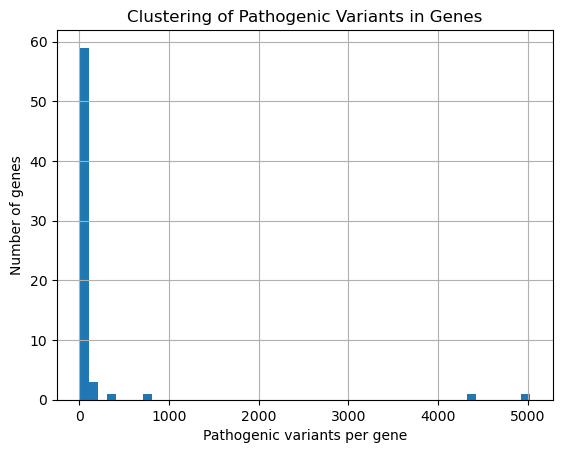

In [72]:
gene_variant_counts_bc.hist(bins=50)
plt.xlabel("Pathogenic variants per gene")
plt.ylabel("Number of genes")
plt.title("Clustering of Pathogenic Variants in Genes")
plt.show()



Focus on   BRCA1 BRCA2. Do pathogenic variants of breast cancer cluster at specific positions inside a gene?

In [77]:
#Checking positions at which these gene cluster
#breast cancer genes

bc_genes= ["BRCA1", "BRCA2", "TP53", "PALB2", "ATM", "CHEK2"]
bc_variants= pathogenic_variants_breast_cancer[pathogenic_variants_breast_cancer['GeneSymbol'].isin(bc_genes)].copy()
bc_variants.shape

(10775, 9)

In [78]:
bc_variants

,GeneSymbol,ClinicalSignificance,PhenotypeList,Chromosome,ReviewStatus,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,VariantType
2337,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23646214,A,T,SNV
2338,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634893,A,T,SNV
2339,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23614792,G,C,SNV
2340,PALB2,[Pathogenic/Likely pathogenic],Fanconi anemia complementation group N|Familia...,16,"[criteria provided, multiple submitters, no ...",23603471,G,C,SNV
2341,PALB2,[Pathogenic],Fanconi anemia complementation group N|Heredit...,16,"[criteria provided, multiple submitters, no ...",23634324,G,A,SNV
...,...,...,...,...,...,...,...,...,...
343120,PALB2,[Pathogenic/Likely pathogenic],Hereditary cancer-predisposing syndrome|Famili...,16,"[criteria provided, multiple submitters, no ...",23635944,C,CT,Insertion
343215,BRCA2,[Pathogenic],"not provided|Breast-ovarian cancer, familial, ...",13,[reviewed by expert panel],32914046,G,GT,Insertion
343216,BRCA2,[Pathogenic],"not provided|Breast-ovarian cancer, familial, ...",13,[reviewed by expert panel],32339909,G,GT,Insertion
343415,BRCA1,[Pathogenic],"not provided|Breast-ovarian cancer, familial, ...",17,[reviewed by expert panel],41245043,A,ATGTCCCAATGGATACTT,Insertion


In [80]:
pathogenic_variants_breast_cancer.shape

(11513, 9)

In [82]:
#positional spread per gene

bc_variants.groupby('GeneSymbol')['PositionVCF'].describe()

,count,mean,std,min,25%,50%,75%,max
GeneSymbol,,,,,,,,
ATM,708.0,1.082300e+08,7.611538e+04,108098352.0,1.081626e+08,108229276.5,1.082905e+08,108365476.0
BRCA1,4400.0,4.179887e+07,4.008834e+06,-1.0,4.124456e+07,41276060.0,4.309258e+07,43124117.0
BRCA2,5033.0,3.258868e+07,1.249833e+06,-1.0,3.233970e+07,32398396.0,3.291384e+07,32972574.0
CHEK2,174.0,2.857695e+07,3.096763e+06,-1.0,2.870517e+07,28734682.5,2.910438e+07,29130689.0
PALB2,396.0,2.351377e+07,1.677450e+06,-1.0,2.362603e+07,23635378.5,2.364133e+07,23652478.0
TP53,64.0,7.626156e+06,4.873762e+04,7574017.0,7.578212e+06,7625084.5,7.674893e+06,7676152.0


In [84]:
## Min MAx are genomic span where disease causing variants occur. Smaller span and many variants mean stronger clustering
# mean= avg genomic coordinate of variants
#low std= tight cluster
#high std= gene wide constarint
# 25% = #variants before this position
# 75-25 (if small) then strong positional clustering if quartile span most of gene variants evenly distributed

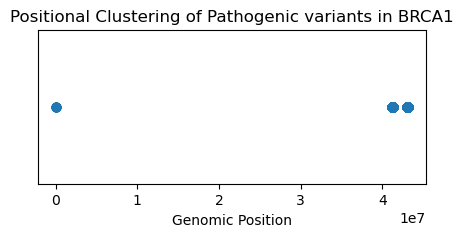

In [88]:
# Visualizing positional clustering of BRCA1 gene

gene='BRCA1'
gene_df=bc_variants[bc_variants['GeneSymbol']== gene]
plt.figure(figsize=(5,2))
plt.scatter(gene_df['PositionVCF'],[1]*len(gene_df),alpha=0.6)
plt.yticks([])
plt.xlabel('Genomic Position')
plt.title(f'Positional Clustering of Pathogenic variants in {gene}')
plt.show()

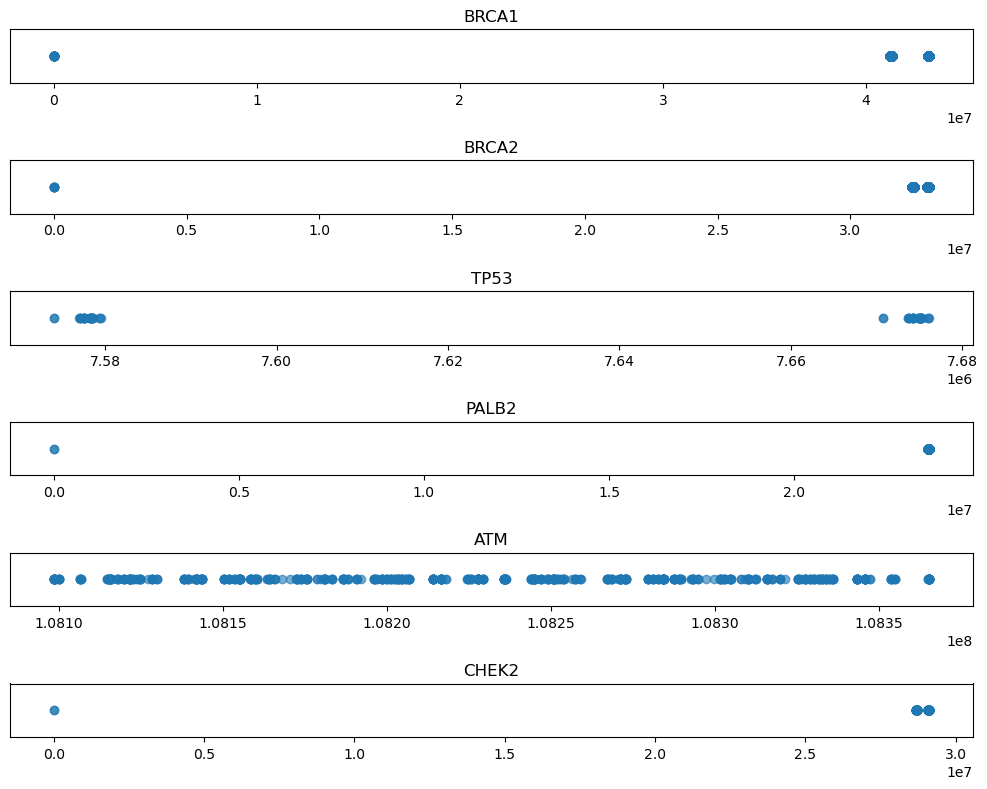

In [92]:
fig, axes = plt.subplots(len(bc_genes), 1, figsize=(10, 8), sharex=False)

for ax, gene in zip(axes, bc_genes):
    gene_df = bc_variants[bc_variants["GeneSymbol"] == gene]
    ax.scatter(gene_df["PositionVCF"], [1]*len(gene_df), alpha=0.6)
    ax.set_yticks([])
    ax.set_title(gene)

plt.tight_layout()
plt.show()


In [94]:
# variant density per gene

cluster_scores= []

for gene, gdf in bc_variants.groupby("GeneSymbol"):
    span = gdf["PositionVCF"].max() - gdf["PositionVCF"].min()
    density = len(gdf) / span if span > 0 else 0

    cluster_scores.append({
        "Gene": gene,
        "Variant_Count": len(gdf),
        "Genomic_Span": span,
        "Variant_Density": density
    })

cluster_df = pd.DataFrame(cluster_scores)
cluster_df.sort_values("Variant_Density", ascending=False)

,Gene,Variant_Count,Genomic_Span,Variant_Density
0,ATM,708,267124,0.002650
5,TP53,64,102135,0.000627
2,BRCA2,5033,32972575,0.000153
1,BRCA1,4400,43124118,0.000102
4,PALB2,396,23652479,0.000017
3,CHEK2,174,29130690,0.000006


In [103]:
#comparing pathogenic vs bengin clustering in breast cancer

def positional_density(df):
    span=df['PositionVCF'].max() - df['PositionVCF'].min()
    return len(df)/span if span > 0 else 0
    
compare=[]

for gene in bc_genes:
    patho_df=df[(df['GeneSymbol']==gene) & (df['ClinicalSignificance'].astype(str).str.contains('Pathogenic', na=False))]
    benign_df=df[(df['GeneSymbol']==gene) & (df['ClinicalSignificance'].astype(str).str.contains('Benign',na=False))] 
    compare.append({"Gene": gene, "PathogenicDensity": positional_density (patho_df),'BenighDensity':positional_density(benign_df)})             

In [104]:
pd.DataFrame(compare)

,Gene,PathogenicDensity,BenighDensity
0,BRCA1,0.000109,0.000034
1,BRCA2,0.000159,0.000048
2,TP53,0.000035,0.002423
3,PALB2,0.000019,0.007215
4,ATM,0.000007,0.002799
5,CHEK2,0.000005,0.000267
